# Global Video Game Sales Analysis

## Introduction

The following is an in-depth analysis of video game sales spanning from 1980 to 2016. 


The analysis includes detailed explorations of:
- Games released per year, charting the rise in popularity of the industry.
- Sales Variability platform to platform.
- The average life cycle of platforms to determine a ‘current period' for deeper analysis.
- Platform Sales data for the current period.
- Effect of critic and user scores on sales for the top performing platform of the current period.
- Comparing game sales on the top platforms to sales on other platforms.
- Sales by genre in the current period.
- Regional sales in the current period.
- Testing the hypothesis: “Average user ratings of the Xbox One and PC platforms are the same.”
- Testing the hypothesis: “Average user ratings for the Action and Sports genres are different.”

# Libraries

In [1]:
# Import Standard Libraries
import warnings
warnings.filterwarnings('ignore', 'use_inf_as_na', FutureWarning)

# Import Third Party Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats as st

# Global Variables and Settings

In [2]:
# Change the default figure size
plt.rcParams['figure.figsize'] = [12, 6]

issue_counter = 0

sales_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# Load, Explore, and Clean Data

In [3]:
df = None
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Strip and lower column names
df.columns = df.columns.str.strip().str.lower()

In [6]:
def basic_cleaning(df):
    # Define issue_counter as a global variable
    global issue_counter
    
    # length before cleaning
    len_before_drop = len(df)
    # Drop rows with all NaN values
    df = df.dropna(how='all')

    # ... and full duplicates
    df = df.drop_duplicates()

    # ... and rows with NaN in the 'name' column
    df = df.dropna(subset=['name'])

    # length after cleaning
    len_after_drop = len(df)

    number_dropped = len_before_drop - len_after_drop
    
    # Add number dropped to the issue counter
    issue_counter += number_dropped

    print(f"Dropped {number_dropped} rows, or {100*(len_before_drop - len_after_drop)/len_before_drop:.2f}% of the data")
    
    return df

df = basic_cleaning(df)
print(f'Issues solved so far: {issue_counter}')


Dropped 2 rows, or 0.01% of the data
Issues solved so far: 2


### Name Column

In [7]:
# First strip and lower the names column
df['name'] = df['name'].str.strip().str.lower()

# sort the data by 'name' and 'platform'
df = df.sort_values(by=['name', 'platform'])

After taking a look at the sorted data, I can see a lot of values in the name column have an additional annotation at the end. Looks like they are within parenthesis in every case. I can fix this, but first need to cleanup the user score column

### User Score Column

In [8]:
# Get unique values of 'user_score' column
unique_values = sorted(df['user_score'].unique(), key=lambda x: (str(type(x)), x)) # Sort by type and then value
print(f" Unique Values for user score: {unique_values}")

 Unique Values for user score: [nan, '0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2', '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd']


In [9]:
# Will leave NaN as is, since it represents missing data. Will also convert 'tbd' to NaN
pd.to_numeric(df['user_score'], errors='coerce')

# Then convert user_score to float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Print the unique values of 'user_score' after cleaning
unique_values = sorted(df['user_score'].unique(), key=lambda x: float('inf') if pd.isna(x) else x) # Puts NaN at the end
print(f"Unique Values for user score: {unique_values}")


Unique Values for user score: [0.0, 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, nan]


### Name Column Continued

In [10]:
# Make a list of all the unique stings within parentheses in the 'name' column

# Extract the strings within parentheses in the 'name' column
paren_strings = df['name'].str.extract(r'\((.*?)\)').dropna() # creates a DataFrame with the strings in parentheses 

# Sort the DataFrame by the values in the first (and only) column
paren_strings = paren_strings.sort_values(0)

# Get the unique values in the DataFrame
paren_strings = paren_strings[0].unique()

# Convert the unique values to a list
paren_strings = paren_strings.tolist()

print(paren_strings)


['2006', '2008', '2009', '2010', '2012', '2013', '2014', '2015', '2016', '3ds', '8-bit', 'all region sales', 'all regions sales', 'america weekly sales', 'american and others sales', 'american sales', 'cd', 'codemasters', 'console version', 'correct us sales', 'ds & mobile versions', 'ds version', 'ds versions', 'ebkore+', 'gbc', 'higher jp sales', 'insomniac', 'japan', 'japan sales', 'joukan', 'jp', 'jp & incomplete us sales', 'jp & others sales', 'jp sales', 'jp sales, but wrong system', 'jp version', 'jp weekly sales', 'koei', 'north america', 'old all region sales', 'old jp sales', 'old us sales', 'online edition', 'others sales', 'pal', 'ps1 & psp versions', 'psp', 'red', 'remake', 'rp-m', 'rp-t', 'ryoku', 'sales, but wrong system', 'telltale', 'us & others sales', 'us sales', 'us weekly sales', 'weekly american sales', 'weekly jp sales', 'wii & ps2 version', 'xbox 360, ps2, ps3, wii & pc versions', 'xbox 360, ps3, & pc versions']


In [11]:
# Categorize the issues: requires some human input

paren_strings_categories = {'year': ['2006', '2008', '2009', '2010', '2012', '2013', '2014', '2015', '2016'],
                            'platform': ['3ds', 'ds version', 'ds versions', 'gbc', 'psp', 'ds & mobile versions', 'console version', 'ps1 & psp versions', 'wii & ps2 version', 'xbox 360, ps2, ps3, wii & pc versions', 'xbox 360, ps3, & pc versions'],
                            'region': ['japan', 'jp', 'jp version', 'north america'],
                            'region_sales': ['all region sales', 'all regions sales', 'american and others sales', 'american sales', 'correct us sales', 'japan sales', 'jp & others sales', 'jp sales', 'others sales', 'us & others sales', 'us sales'],
                            'weekly': ['america weekly sales', 'jp weekly sales', 'us weekly sales', 'weekly american sales', 'weekly jp sales'],
                            'part_of_title': ['8-bit', 'cd', 'codemasters', 'ebkore+', 'insomniac', 'joukan', 'koei', 'pal', 'red', 'remake', 'ryoku', 'telltale', 'online edition'],
                            'bad': ['jp & incomplete us sales', 'higher jp sales', 'jp sales, but wrong system', 'old all region sales', 'old jp sales', 'old us sales', 'sales, but wrong system'],
                            'ratting': ['rp-m', 'rp-t']
                            }

In [12]:
def check_all_paren_strings_categorized():
    '''
    Sanity check to make sure all strings are categorized. Raises ValueError if a string is found in multiple categories or not categorized at all. Function for sake of variable scope
    
    Returns: None
    '''
    for string in paren_strings:
        found_keys = []  # List to keep track of keys where string is found
        for key, value in paren_strings_categories.items():
            if string in value:
                found_keys.append(key)
        if len(found_keys) > 1:
            raise ValueError(f"String '{string}' found in multiple categories: {found_keys}")
        elif not found_keys:
            raise ValueError(f"String '{string}' not categorized")
    print("All strings categorized.")

check_all_paren_strings_categorized()

All strings categorized.


In [13]:
def get_category(paren_string, paren_strings_categories):
    """
    Returns the category of a given paren_string based on the provided paren_strings_categories dictionary.

    Parameters:
    - paren_string (str): The string to find the category for.
    - paren_strings_categories (dict): A dictionary mapping categories to lists of strings.

    Returns:
    - str: The category of the paren_string.

    Raises:
    - ValueError: If the paren_string is not found in the paren_strings_categories dictionary.
    """
    for key, value in paren_strings_categories.items():
        if paren_string in value:
            return key
    raise ValueError(f"paren_string '{paren_string}' not in paren_strings_categories")


In [14]:
def normalize_names(debug=False):
    """
    Normalize the names in the DataFrame by removing unnecessary information within parentheses. Updates information according to the paren_strings_categories dictionary.

    Args:
        debug (bool, optional): If True, print debug information. Defaults to False.

    Returns:
        pandas.DataFrame: The DataFrame with normalized names.

    """

    # sort df by 'name' and 'platform'
    temp_df = df.sort_values(['name', 'platform']).reset_index(drop=True)

    # List to keep track of the indexes to drop
    drop_index = []

    # Initialize issue counter as a global variable
    global issue_counter

    # Iterate over the rows in the DataFrame
    for row in temp_df.itertuples():
        # Define relevant variables
        index = row.Index
        name = row.name
        platform = row.platform
        year_of_release = row.year_of_release
        na_sales = row.na_sales
        eu_sales = row.eu_sales
        jp_sales = row.jp_sales
        other_sales = row.other_sales
        rating = row.rating

        # Check if the name contains the string '(' and ')'
        # If either '(' or ')' is not in the name...
        if not name.find('(') != -1 or not name.find(')') != -1:
            # skip the row
            continue
        else:
            if debug:  # Print space to separate rows
                print()
            # Extract the string within the parentheses
            paren_string = name[name.find('(')+1:name.find(')')]
            if debug:
                print(f"paren string: ({paren_string}) found at index {index}")

            # Define the true title by removing the paren_string, and '(' and ')' from the name, then strip whitespace
            true_title = name.replace(f"({paren_string})", '').strip()
            if debug:
                print(f"true title: {true_title}")

            category = get_category(paren_string, paren_strings_categories)

            #######################################
            ### TRANSFORM ACCORDING TO CATEGORY ###
            #######################################
            
            if category == 'part_of_title' or category == 'platform' or category == 'region': # Do nothing because it's part of the title, or unique descriptor of the title.
                continue

            elif category == 'year':
                if pd.isna(year_of_release):  # If year_of_release is NaN
                    # Add the year to the year_of_release column
                    temp_df.at[index, 'year_of_release'] = int(paren_string)
                else:
                    if debug:
                        print(
                            f"Year of release already noted: {year_of_release}")
                # Apply the 'true title'
                temp_df.at[index, 'name'] = true_title
                issue_counter += 1

            elif category == 'weekly' or category == 'bad' or category == 'ratting':
                drop_index.append(index) # Drop the rows because the data cannot be reliably attributed
                issue_counter += 1

            elif category == 'region_sales': # Trust the sales data, discrepancies will be handled by aggregation
                # Apply the 'true title'
                temp_df.at[index, 'name'] = true_title

    # Drop the rows in the drop_index list
    temp_df = temp_df.drop(drop_index)

    return temp_df

In [15]:
def clean_name_column():
    """
    Cleans the name column in the DataFrame by performing the following steps:
    1. Normalizes the names in the DataFrame.
    2. Converts 0s to NaN in the sales columns for the sake of aggregation, treating 0s as missing values.
    3. Defines aggregation functions for each column besides name and platform.
    4. Groups the DataFrame by 'name' and 'platform' and applies the aggregation functions.
    
    Returns:
    - df: The cleaned DataFrame with aggregated values.
    """
    
    global issue_counter
              
    df = normalize_names()
    
    # Convert 0s to NaN in the sales columns for sake of aggregation - treating 0's as missing values
    
    for col in sales_cols:
        df[col] = df[col].replace(0, np.nan)
    
    # Define aggregation functions for each column besides name and platform
    agg_funcs = {'year_of_release': 'first',
                 'genre': 'first',
                 'na_sales': 'mean',
                 'eu_sales': 'mean',
                 'jp_sales': 'mean',
                 'other_sales': 'mean',
                 'rating': 'first',
                 'critic_score': 'mean',
                 'user_score': 'mean',
    } 
    #NaN values with mean will be ignored, instances with all NaN will return NaN
    #NaN values with first will return the first non-NaN value, instances with all NaN will return NaN
    
    len_before_group = len(df)
    # Group by 'name' and 'platform' and apply the aggregation functions
    df = df.groupby(['name', 'platform']).agg(agg_funcs).reset_index()
    len_after_group = len(df)
    
    issues_solved_by_grouping = len_before_group - len_after_group
    issue_counter += issues_solved_by_grouping
    
    return df



In [16]:
df = clean_name_column()

In [17]:
print(f"Total issues solved so far: {issue_counter}")

Total issues solved so far: 190


### Year of Release Column

In [18]:
# Year of release for the title 'strongest tokyo university shogi ds' should be 2010. This mistake was revealed when plotting platform sales per year.
# Change year of release to 2010
df.loc[df['name'] == 'strongest tokyo university shogi ds', 'year_of_release'] = 2010
# 'ds' is part of the title, so it should not be removed
issue_counter += 1

In [19]:
print(f"Unique values for year of release: {sorted(df['year_of_release'].unique())}")

Unique values for year of release: [1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan]


Since games can be released in different years on different platforms, I won't grab release years from the same title with a different platform. The previous logic for handling the annotations in the name column effectively added year of release wherever noted in the name and not the column. The remaining will have to stay NaN.

### Genre Column

In [20]:
print(f'NaN count for genre: {df["genre"].isna().sum()}')
print(f'Unique values for genre: {df["genre"].unique()}')

NaN count for genre: 0
Unique values for genre: ['Sports' 'Role-Playing' 'Action' 'Racing' 'Shooter' 'Misc' 'Adventure'
 'Puzzle' 'Simulation' 'Platform' 'Strategy' 'Fighting']


### Sales Columns

**Note:** Rows with zero in any of the sales columns have been changed to NaN, since most likely this means the title was not available in that region (see the clean_name column function).

In [21]:
for col in sales_cols:
    print(f'{col} description:\n{df[col].describe()}\n')

na_sales description:
count    12171.000000
mean         0.360295
std          0.934393
min          0.010000
25%          0.060000
50%          0.140000
75%          0.340000
max         41.360000
Name: na_sales, dtype: float64

eu_sales description:
count    10810.000000
mean         0.223683
std          0.611528
min          0.010000
25%          0.020000
50%          0.070000
75%          0.200000
max         28.960000
Name: eu_sales, dtype: float64

jp_sales description:
count    6179.000000
mean        0.209580
std         0.479965
min         0.010000
25%         0.030000
50%         0.070000
75%         0.190000
max        10.220000
Name: jp_sales, dtype: float64

other_sales description:
count    10078.000000
mean         0.078349
std          0.235362
min          0.010000
25%          0.010000
50%          0.020000
75%          0.070000
max         10.570000
Name: other_sales, dtype: float64



### Ratings Column

In [22]:
print(f'NaN count for rating: {df["rating"].isna().sum()}')
print(f'Unique values for rating: {df["rating"].unique()}')

NaN count for rating: 6638
Unique values for rating: [None 'T' 'E' 'E10+' 'M' 'RP' 'EC' 'AO' 'K-A']


In [23]:
# Q: Are there any titles with multiple ratings?
def count_multiple_ratings_per_title():
    # Create a df with the count of unique ratings per title
    multiple_ratings = df.groupby('name')['rating'].nunique().sort_values(ascending=False)
    
    multiple_ratings = multiple_ratings[multiple_ratings > 1]
    
    print(f'There are {len(multiple_ratings[multiple_ratings > 1])} titles with multiple ratings.')
    return multiple_ratings

count_multiple_ratings_per_title()

There are 173 titles with multiple ratings.


name
the chronicles of narnia: the lion, the witch and the wardrobe    3
the sims 2: castaway                                              3
shaun white snowboarding                                          3
wrc: fia world rally championship                                 3
ghostbusters: the video game                                      3
                                                                 ..
the legend of spyro: dawn of the dragon                           2
up                                                                2
crash: mind over mutant                                           2
the legend of spyro: a new beginning                              2
the last airbender                                                2
Name: rating, Length: 173, dtype: int64

There are plenty of examples where a title has discrepancies on rating between different platforms, so I can't infer ratings based off info for other platforms. I will change the None values to "Unknown" since this column is categorical and I don't want to drop those rows when plotting. 

In [24]:
# Replace None with "unknown"
df["rating"] = df["rating"].fillna("Unknown")
print("After Transformation:")
print(f'NaN count for rating: {df["rating"].isna().sum()}')
print(f'Unique values for rating: {df["rating"].unique()}')



After Transformation:
NaN count for rating: 0
Unique values for rating: ['Unknown' 'T' 'E' 'E10+' 'M' 'RP' 'EC' 'AO' 'K-A']


### Critic Score Column

In [25]:
print(f'NaN count for critic_score: {df["critic_score"].isna().sum()}')
print(f'Unique values for critic_score: {sorted(df["critic_score"].unique())}')

NaN count for critic_score: 8448
Unique values for critic_score: [nan, 13.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0]


In [26]:
# Q: Are there any titles with multiple critic scores?
def count_multiple_critic_scores_per_title():
    # Create a df with the count of unique critic scores per title
    multiple_critic_scores = df.groupby('name')['critic_score'].nunique().sort_values(ascending=False)

    multiple_critic_scores = multiple_critic_scores[multiple_critic_scores > 1]
    
    print(f'There are {len(multiple_critic_scores)} titles with multiple critic scores.')
    return multiple_critic_scores

count_multiple_critic_scores_per_title()

There are 1584 titles with multiple critic scores.


name
madden nfl 07                                9
lego star wars ii: the original trilogy      7
spider-man 3                                 7
lego batman: the videogame                   7
harry potter and the order of the phoenix    7
                                            ..
the king of fighters xii                     2
nba starting five                            2
nba street                                   2
tiger woods pga tour 14                      2
nba street homecourt                         2
Name: critic_score, Length: 1584, dtype: int64

Looks like critic scores for the same title can differ between platforms. I wonder if this is also true with user scores.

### User Score Column Continued

In [27]:
print(f"NaN count for user_score: {df['user_score'].isna().sum()}")
print(f"Unique values for user_score: {sorted(df['user_score'].unique())}")

NaN count for user_score: 8996
Unique values for user_score: [nan, 0.0, 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.75, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7]


In [28]:
def count_multiple_user_scores_per_title():
    # Create a df with the count of unique user scores per title
    multiple_user_scores = df.groupby('name')['user_score'].nunique().sort_values(ascending=False)

    multiple_user_scores = multiple_user_scores[multiple_user_scores > 1]
    
    print(f'There are {len(multiple_user_scores)} titles with multiple user scores.')
    return multiple_user_scores

count_multiple_user_scores_per_title()

There are 1519 titles with multiple user scores.


name
madden nfl 07                          9
lego marvel super heroes               8
lego jurassic world                    7
fifa soccer 13                         7
fifa 14                                7
                                      ..
bioshock the collection                2
bioshock 2                             2
project: snowblind                     2
teen titans                            2
need for speed carbon: own the city    2
Name: user_score, Length: 1519, dtype: int64

Looks to be the same case for user score. I will have to leave NaN values as is in both cases.

### Total Sales Column

In [29]:
# Create the total sales column by adding the sales columns
df['total_sales'] = df[sales_cols].sum(axis=1, min_count=1) # min_count=1 to result in NaN if all values are NaN

# Add total sales to the sales_cols list
sales_cols.append('total_sales')

# Reorder the columns to my liking
df = df[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'rating', 'critic_score', 'user_score']]

print(df['total_sales'].describe())

count    16577.000000
mean         0.536150
std          1.554019
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64


In [30]:
print(f"Total data issues solved: {issue_counter}")

Total data issues solved: 191


### Summary

Significant issues existed in the name column with annotations appended to the names denoting other useful information, sometimes not included in the appropriate column. These issues were singled out by looking for the use of parenthesis. Strings with the parenthesis were then categorized into a dictionary so that each situation could be handled programmatically. This also allows for easier adjustment of the process if further details are revealed about these annotations.

Zero values in any of the sales columns were assigned the NaN value type, as they likely indicate the title was not available for sale in that region.

In total 191 issues with data solved and accounted for. 

# Games Released per Year

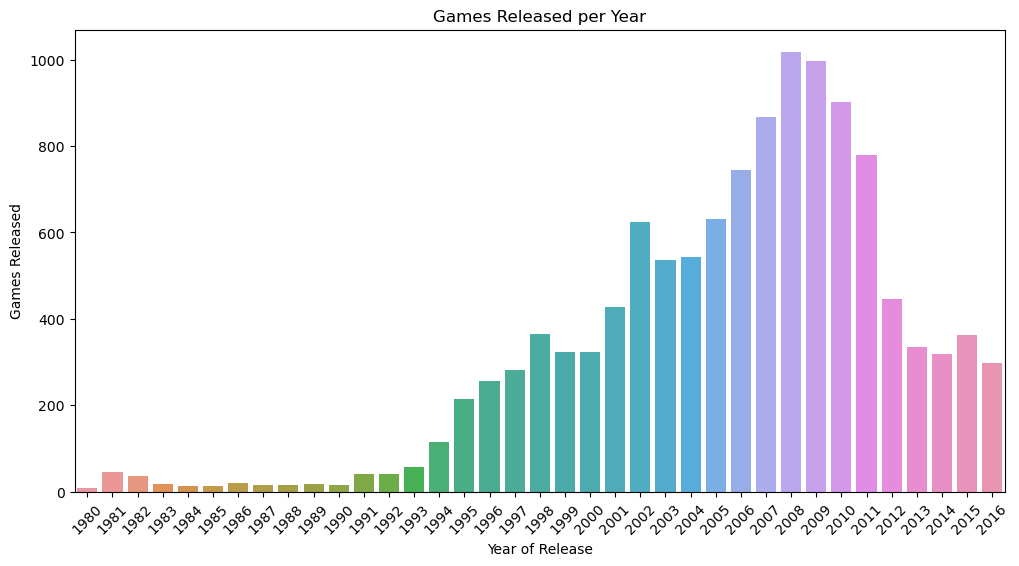

In [31]:
# Drop nan, convert year to int
games_per_year = df[['name', 'year_of_release']].copy().dropna().astype({'year_of_release': int})

# Group by year and count the number of unique titles
games_per_year = games_per_year.groupby('year_of_release')['name'].nunique().reset_index()

# Plot the number of unique names per year
plot = sns.barplot(data=games_per_year, x='year_of_release', y='name')

# Set the title
plot.set_title('Games Released per Year')
plot.set(xlabel='Year of Release', ylabel='Games Released')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

# Create an images folder if it doesn't exist
!mkdir -p images

# Save the plot
plt.savefig('images/games_per_year.png')

plt.show()

There is a large disparity  in number of games released  per year. This is not surprising since video game popularity has skyrocketed  since 1980 (the earliest year represented in the data set). For the sake of analysis in modern day context, years before 1996 probably do not have a significant enough amount of data.

# Sales Variability Platform to Platform

In [32]:
# Define Color dictionary for Platforms
color_dict = {'PS': 'blue', 'PS2': 'mediumblue', 'PS3': 'deepskyblue', 'PS4': 'navy',
              'PSP': 'lightsteelblue', 'PSV': 'skyblue',
                'X360': 'green', 'XB': 'darkgreen', 'XOne': 'lime',
                'Wii': 'red', 'WiiU': 'darkred', 'GB':'lightcoral', 'GBC': 'firebrick', 'DS': 'salmon', '3DS': 'crimson',
                'GBA': 'orange', 'GC': 'darkorange',
                'N64': 'gold', 'NES': 'yellow', 'SNES': 'khaki',
                'PC': 'grey',
                'GEN': 'black',
                '2600': 'brown',
                'SAT': 'pink',
                'NG': 'purple',
                'SCD': 'violet',
                'WS': 'indigo',
                'PCFX': 'magenta',
                'TG16': 'orchid',
                '3DO': 'plum',
                'GG': 'deeppink',
                'DC': 'hotpink'                
}

# Check that all platforms have a unique color
def check_color_assignment():
    colors = []
    for platform in df['platform'].unique():
        color = color_dict[platform]
        # Check if the platform is in the color_dict
        if platform in color_dict:
            # Check if the color is already in the list
            if color in colors:
                raise ValueError(f'Color {color} is already assigned to a platform')
            else:
                colors.append(color)
        else:
            # Raise an error if the platform is not in the color_dict
            raise ValueError(f'Platform {platform} not in color_dict')
    
check_color_assignment()
        

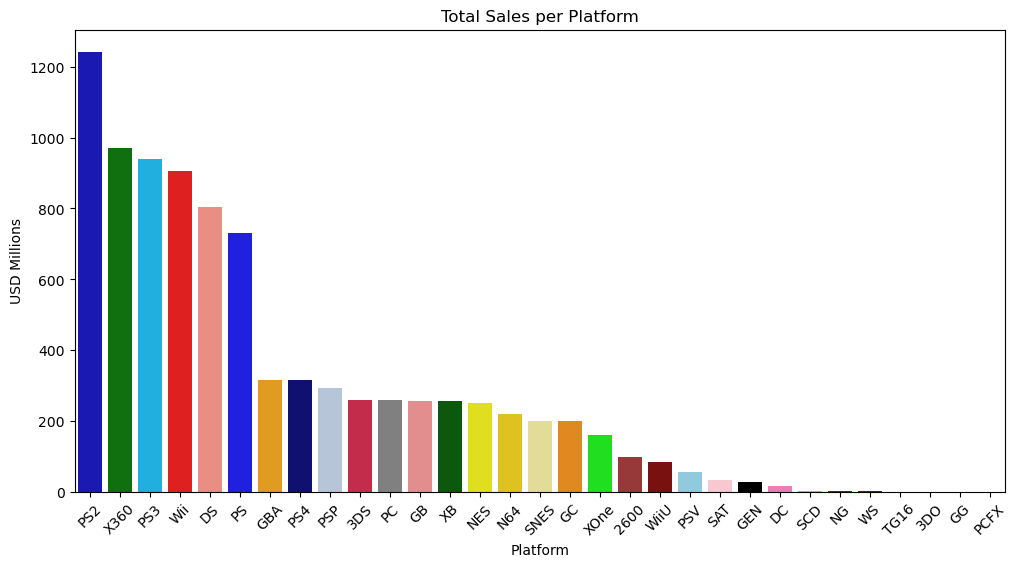

In [33]:
# Copy Platform and Total sales, group by platform and sum the total sales, sort
platform_sales = df[['platform','total_sales']].copy().groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

# Plot the df
plot = sns.barplot(data=platform_sales, x='platform', y='total_sales', palette=color_dict)

# Set the title
plot.set_title('Total Sales per Platform')
# Set the labels
plot.set(xlabel='Platform', ylabel='USD Millions')
# Rotate the x-axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

# Save the plot
plt.savefig('images/total_sales_per_platform.png')

plt.show()

# Average Platform Life Cycle

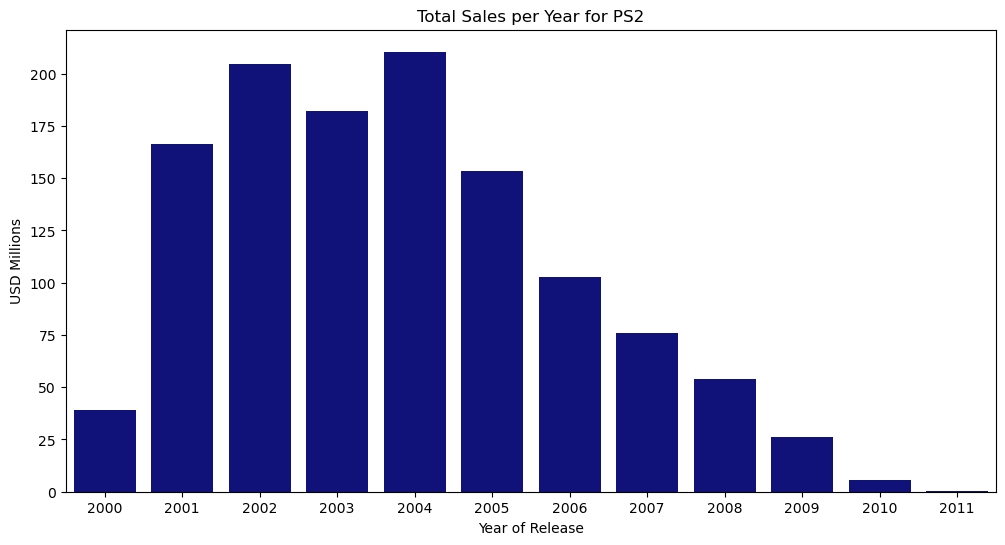

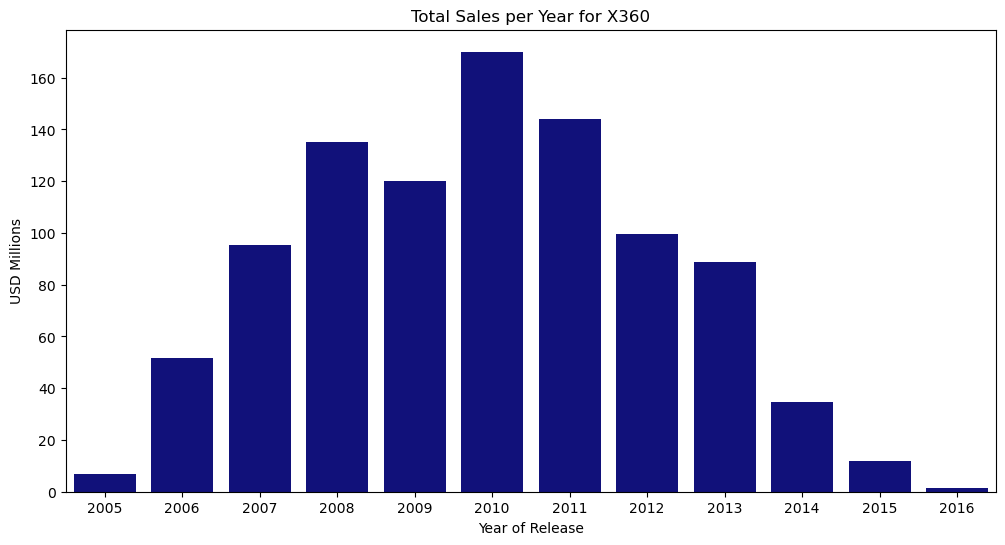

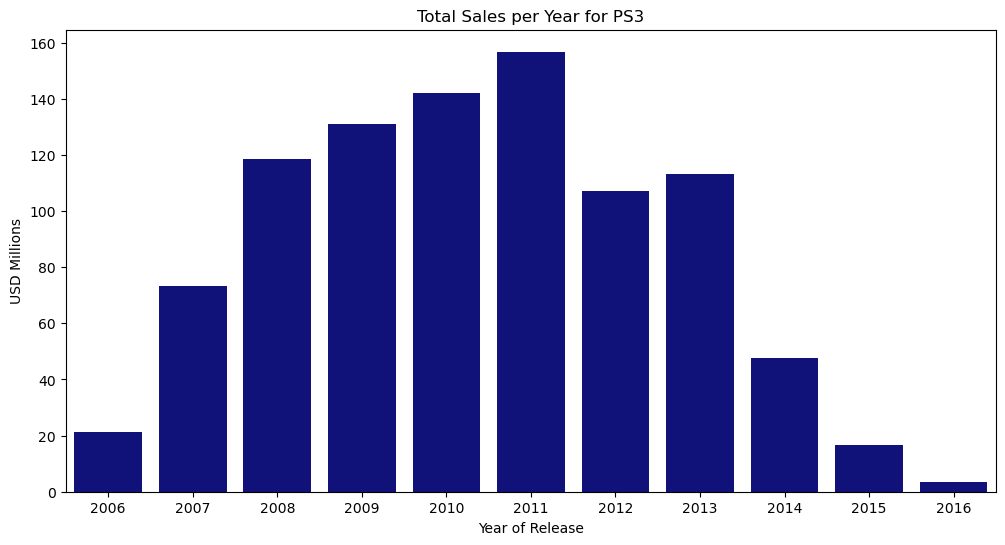

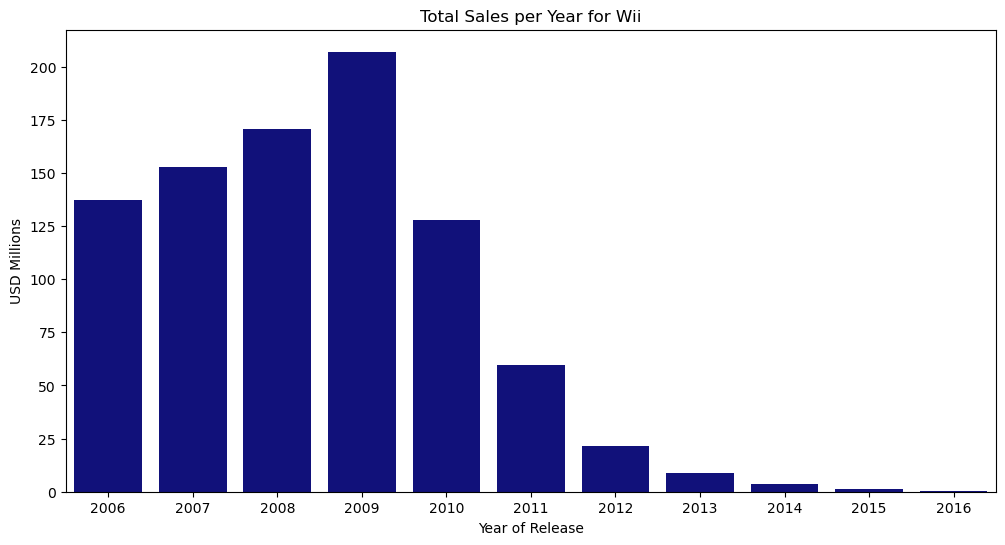

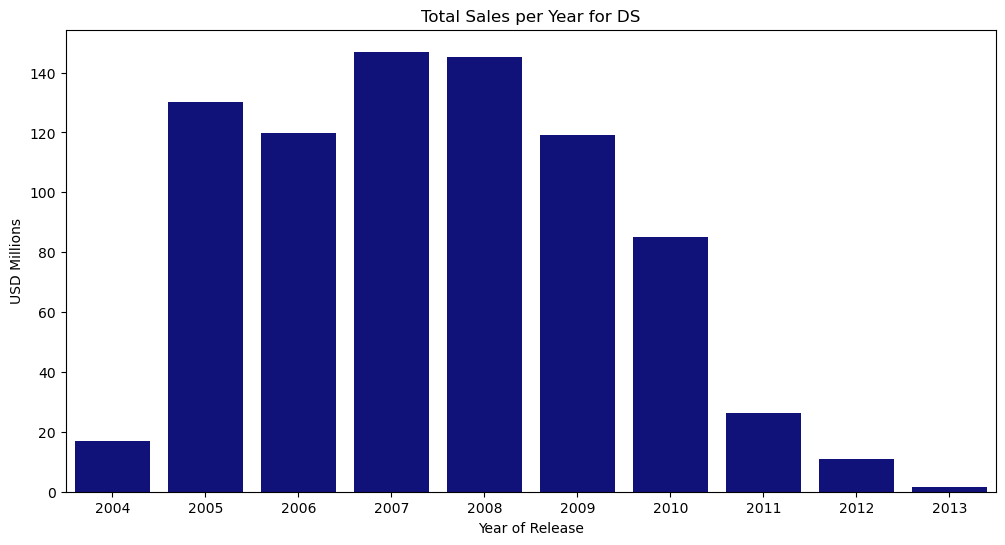

Average life cycle of the top platforms: 5.00 years


In [34]:
# Define top platforms
top_platforms = platform_sales['platform'].head(5).tolist()

# Define DF for plot
platform_sales_per_year = df[['platform', 'year_of_release', 'total_sales']].copy().dropna().astype({'year_of_release': int}).groupby(['platform', 'year_of_release']).sum().reset_index()


# Filter to top platforms
platform_sales_per_year = platform_sales_per_year[platform_sales_per_year['platform'].isin(top_platforms)]


# Create an empty dictionary to store life cycle information
platform_life_cycle = {}

# Plot the sales per year for each platform
for platform in top_platforms:
    # Filter the df by platform
    platform_df = platform_sales_per_year[platform_sales_per_year['platform'] == platform].reset_index(drop=True)
    
    # Plot the sales per year for the platform
    plot = sns.barplot(data=platform_df, x='year_of_release', y='total_sales', color='darkblue')
    # Set the title
    plot.set_title(f'Total Sales per Year for {platform}')
    # Set the labels
    plot.set(xlabel='Year of Release', ylabel='USD Millions')
    
    # Save the plot
    plt.savefig(f'images/total_sales_per_year_{platform}.png')
    
    plt.show()
    
    # Calculate the life cycle of the platform
    # First year of release
    first_year = platform_df['year_of_release'].min()
    # Year of peak sales
    peak_year = platform_df.loc[platform_df['total_sales'].idxmax(), 'year_of_release']
    
    # Add the life cycle information to the dictionary
    life_cycle = peak_year - (first_year - 1) # Add 1 to include the first year
    platform_life_cycle[platform] = life_cycle
    
    
# Average the values in the dictionary
average_life_cycle = sum(platform_life_cycle.values()) / len(platform_life_cycle)

print(f"Average life cycle of the top platforms: {average_life_cycle:.2f} years")


The average time between the release year for the top five platforms and their respective peak sales year is 5 years. Therefor we will consider the 5 most recent years (2012 and beyond) as our current data. 

# Platform Sales Data for the Current Period
## Platforms Leading in Sales

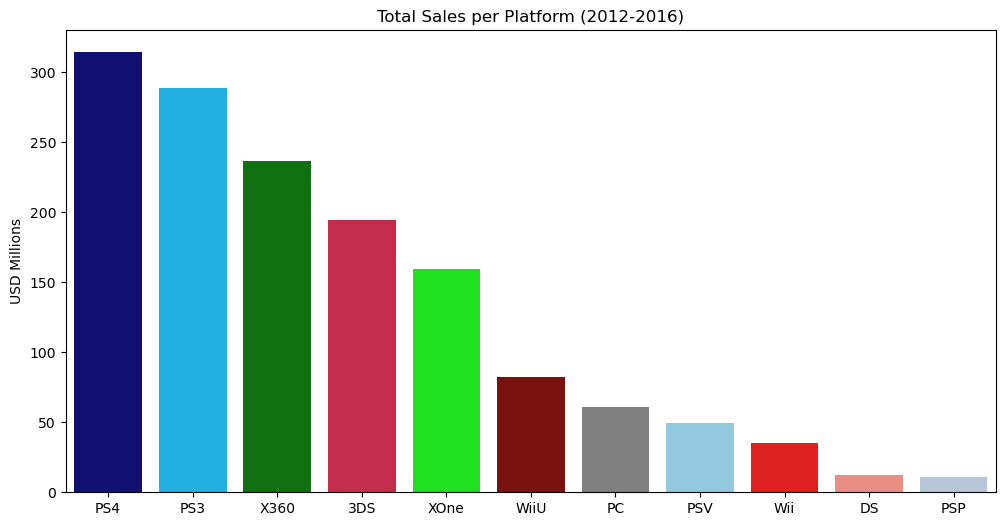

In [35]:
# Filter df to current time period
df_current = df[df['year_of_release'] >= 2012].copy()

# DF for plotting sales per platform
current_platform_sales = df_current[['platform','total_sales']].copy().dropna().groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

# Plot the df
plot = sns.barplot(data=current_platform_sales, x='platform', y='total_sales', palette=color_dict)
# Set the title
plot.set_title('Total Sales per Platform (2012-2016)')
# Set the labels
plot.set(xlabel='', ylabel='USD Millions')

# Save the plot
plt.savefig('images/total_sales_per_platform_2012_2016.png')

plt.show()

For the current time frame, the top three platforms leading in sales are PlayStation 4, PlayStation 3, and Xbox360.

## Platform Life Cycle Stage

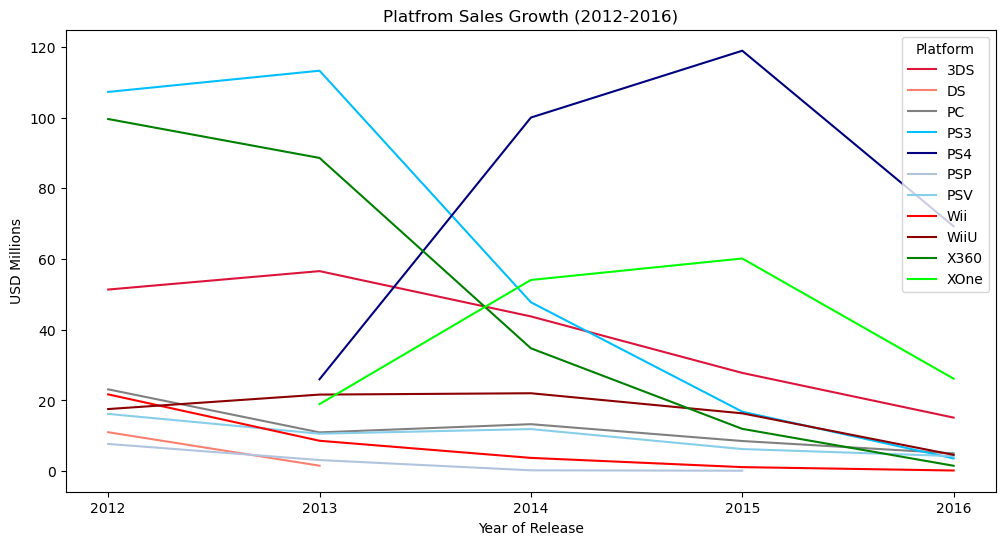

The most recent platform release year is 2013


In [36]:
# DF for plotting platform growth over time
current_platform_sales_per_year = df_current[['platform', 'year_of_release', 'total_sales']].copy().dropna().astype({'year_of_release': int}).groupby(['platform', 'year_of_release']).sum().reset_index()

# Lineplot for each platform
plot = sns.lineplot(data=current_platform_sales_per_year, x='year_of_release', y='total_sales', hue='platform', palette=color_dict)

# Set the title
start_year = current_platform_sales_per_year['year_of_release'].min()
end_year = current_platform_sales_per_year['year_of_release'].max()
plot.set_title(f'Platfrom Sales Growth ({start_year}-{end_year})')

# Set the labels
plot.set(xlabel='Year of Release', ylabel='USD Millions')
plot.xaxis.set_major_locator(ticker.MaxNLocator(integer=True)) # Force integer x-axis labels

plt.legend(title='Platform')

# Save the plot
plt.savefig(f'images/platform_sales_growth_{start_year}_{end_year}.png')

plt.show()

# Dictionary to store the release year of each platform
platform_release_year = {}
for platform in current_platform_sales_per_year['platform'].unique():
    platform_release_year[platform] = df_current[df_current['platform'] == platform]['year_of_release'].min()

# Get the most recent release year
most_recent_release = max(platform_release_year.values())

print(f"The most recent platform release year is {int(most_recent_release)}")


All platforms are currently shrinking, which is unsurprising given that the most recent release date for any platform was 2013.


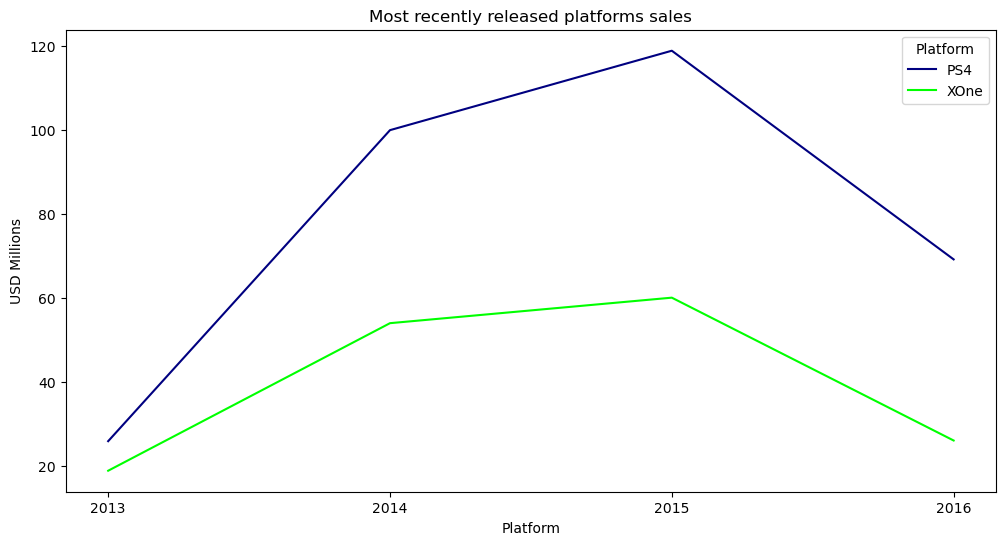

In [37]:
# Get the platforms associated with the most recent release
recent_platforms = [platform for platform, year in platform_release_year.items() if year == most_recent_release]

# Filter the DataFrame
recent_platform_sales = current_platform_sales_per_year[current_platform_sales_per_year['platform'].isin(recent_platforms)]

# Plot the sales per platform for the most recent release year
plot = sns.lineplot(data=recent_platform_sales, x='year_of_release', y='total_sales', hue='platform', palette=color_dict)

# Set the title
plot.set_title(f'Most recently released platforms sales')

# Set the labels
plot.set(xlabel='Platform', ylabel='USD Millions')
plot.legend(title='Platform')
# Set xticks to ints
plot.xaxis.set_major_locator(ticker.MaxNLocator(integer=True)) # Force integer x-axis labels

# Save the plot
plt.savefig(f'images/most_recently_released_platforms_sales.png')

plt.show()

### Potential for Profitability

The platforms with the most potential for profitability are the PlayStation 4 and Xbox One, both just seemingly past their peak by only 1 year, and still within the 5 year life cycle. It is also important to note that sales data for 2016 maybe incomplete, so sales for the PS4 and Xone may not have actually peaked yet. All other platforms in the current period, however, are well into their declining sales period.  

More potential profitability would be a new platform release. (Hindsight: the Nintendo Switch went on to be released in 2017). 

## Annual Sales Distribution Per Platform

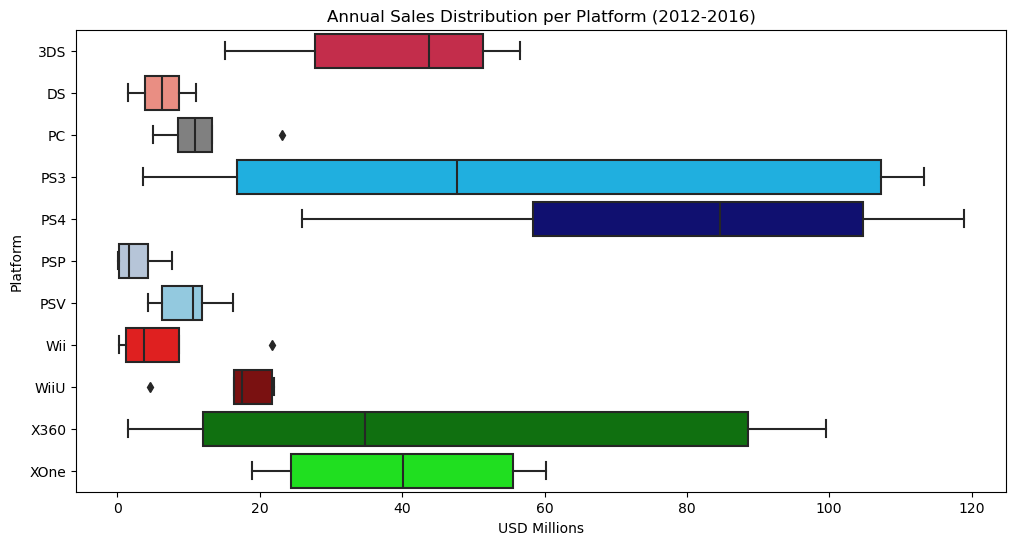

In [38]:
# Boxplot platform sales by year
plot = sns.boxplot(data=current_platform_sales_per_year, x='total_sales', y='platform', palette=color_dict)

# Set the title
plot.set_title(f'Annual Sales Distribution per Platform ({start_year}-{end_year})')

# Set the labels
plot.set(xlabel='USD Millions', ylabel='Platform')

# Save the plot
plt.savefig(f'images/annual_sales_distribution_per_platform_{start_year}_{end_year}.png')

plt.show()

,platform,total_sales
0,3DS,38.9220
1,DS,6.2750
2,PC,12.1860
3,PS3,57.7350
4,PS4,78.5350
5,PSP,2.7975
6,PSV,9.8360
7,Wii,7.0740
8,WiiU,16.4380
9,X360,47.2770


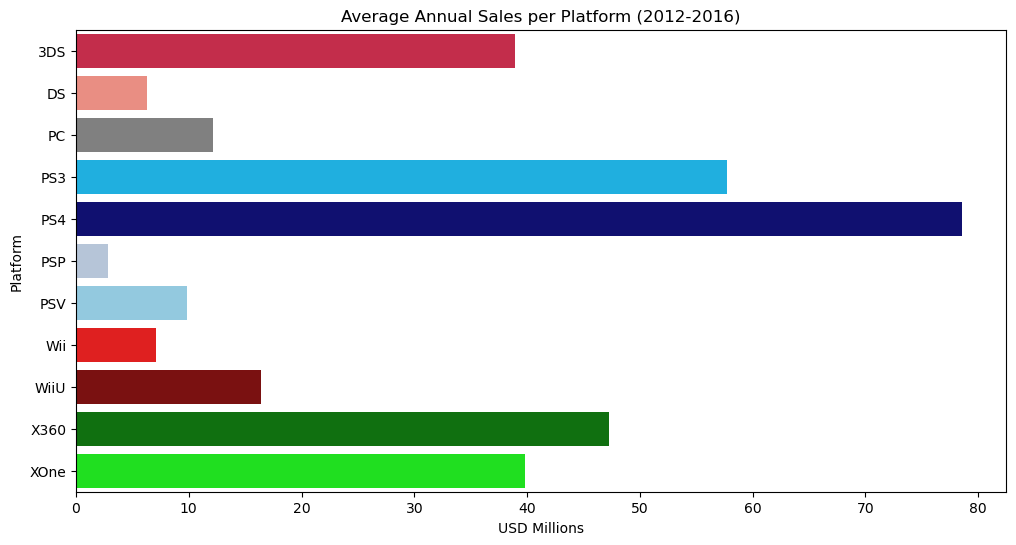

In [39]:
# Average Sales per Platform
avg_sales_per_platform_current = current_platform_sales_per_year.groupby('platform')['total_sales'].mean().reset_index()

display(avg_sales_per_platform_current)

# Plot the df
plot = sns.barplot(data=avg_sales_per_platform_current, x='total_sales', y='platform', palette=color_dict)

# Set the title
plot.set_title(f'Average Annual Sales per Platform ({start_year}-{end_year})')
# Set the labels
plot.set(xlabel='USD Millions', ylabel='Platform')

# Save the plot
plt.savefig(f'images/average_annual_sales_per_platform_{start_year}_{end_year}.png')

plt.show()

## Findings

In terms of total revenue, the top five selling platforms for the current period are: PlayStation 4, Playstation 3, Xbox 360, 3DS, and Xbox One. However, most of these platforms are past their growth cycle for sales. Only the PlayStation 4 and Xbox One have potential for significant profitability since they are either nearing their peak, or just past there peak (considering an average life cycle of about five years, the platform’s growth chart, and the caveat of an incomplete data set for 2016). The highest potential for profitability would be the release of a new platform (the Nintendo Switch was in fact released in 2017). 

Furthermore, it can be concluded that console platforms generally drive more sales than do their portable counterparts - the Nintendo 3DS being the only portable platform represented amount the top five selling platforms, far outpacing all other portable platforms in average annual sales.Also of note, the 3DS’s median and average sales within the current period are competitive with the median and average sales for both Xbox 360 and Xbox one, as well as the PlayStation 3. 

PlayStation, owned by Sony, is the dominant manufacturer of the current period with 4 products in the market place and the PlayStation 4 and PlayStation 3 leading in total sales, and average annual sales for the current time period (respectively). Microsoft’s Xbox 360 and Xbox One struggle to compete with the PlayStation consoles, and face strong competition from the Nintendo 3DS. 


# PlayStation 4 Critic and User Score Analysis

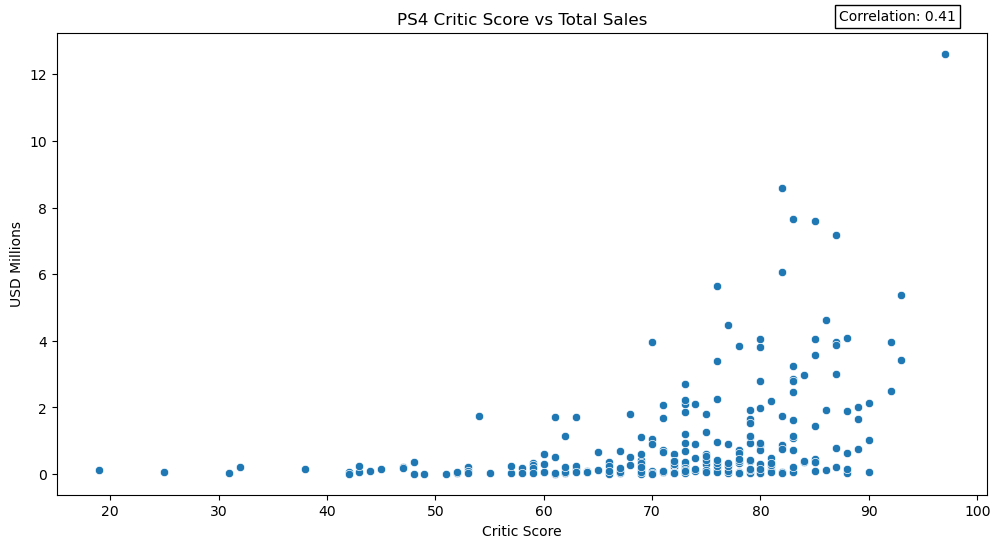

The correlation between critic scores and total sales is 0.40589480145836676


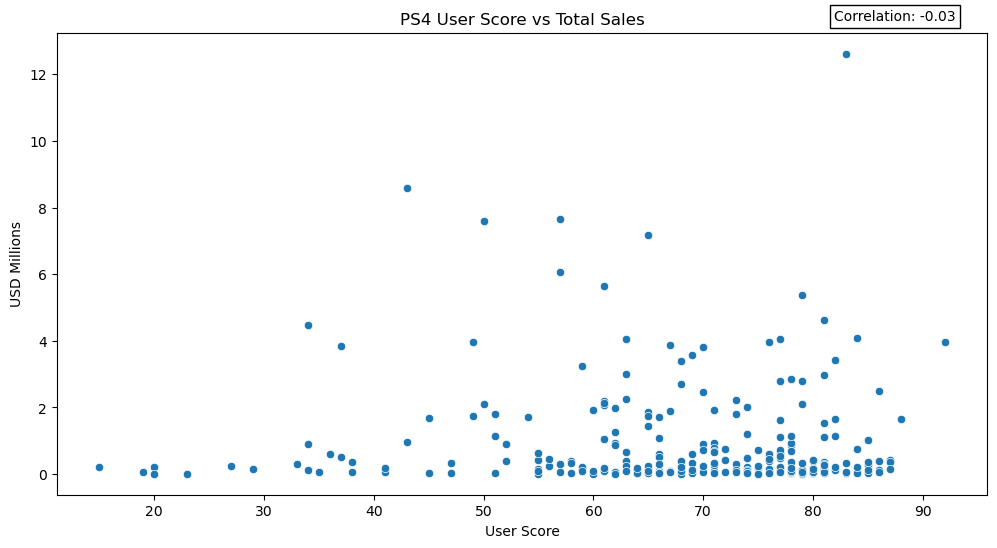

The correlation between user scores and total sales is -0.03362497596528884


In [40]:
# Define the DF
ps4_df = df_current[df_current['platform'] == 'PS4'].copy().dropna(subset=['user_score', 'critic_score']).astype({'year_of_release': int}).reset_index(drop=True)
# Normalize the user score to a 100-point scale
ps4_df['user_score'] = ps4_df['user_score'] * 10

### Critic Score ###
# Calculate the correlation
correlation = ps4_df['critic_score'].corr(ps4_df['total_sales'])

# Build the scatter plot
plot = sns.scatterplot(data=ps4_df, x='critic_score', y='total_sales')

# Set the title
plot.set_title('PS4 Critic Score vs Total Sales')
# Set the labels
plot.set(xlabel='Critic Score', ylabel='USD Millions')

# Add the correlation as a text annotation
x_pos = ps4_df['critic_score'].max() + 1  # Adjust as needed
y_pos = ps4_df['total_sales'].max() + 1 # Adjust as needed
plot.text(x_pos, y_pos, f"Correlation: {correlation:.2f}", horizontalalignment='right')
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1)
plot.text(x_pos, y_pos, f"Correlation: {correlation:.2f}", horizontalalignment='right', bbox=bbox_props)

# Save the plot
plt.savefig('images/ps4_critic_score_vs_total_sales.png')

plt.show()

print(f"The correlation between critic scores and total sales is {correlation}")

### User Score ###
# Calculate the correlation
correlation = ps4_df['user_score'].corr(ps4_df['total_sales'])

# Build the scatter plot
plot = sns.scatterplot(data=ps4_df, x='user_score', y='total_sales')

# Set the title
plot.set_title('PS4 User Score vs Total Sales')
# Set the labels
plot.set(xlabel='User Score', ylabel='USD Millions')

# Add the correlation as a text annotation
x_pos = ps4_df['user_score'].max() + 1  # Adjust as needed
y_pos = ps4_df['total_sales'].max() + 1 # Adjust as needed
plot.text(x_pos, y_pos, f"Correlation: {correlation:.2f}", horizontalalignment='right')
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1)
plot.text(x_pos, y_pos, f"Correlation: {correlation:.2f}", horizontalalignment='right', bbox=bbox_props)

# Save the plot
plt.savefig('images/ps4_user_score_vs_total_sales.png')

plt.show()

print(f"The correlation between user scores and total sales is {correlation}")


The correlation for both critic scores and users scores with relation to sales are generally weak. There is more significant correlation for critic scores (nearly moderate with a correlation value of .41) compared to the very weak correlation between user score and sales (-0.03, basically flat). 
 
The correlation value for critic score to sales seems to suggest that critical praise has a low to moderate effect on gamers’ purchasing patterns. The correlation between user score and sales reflects a wide range of interests and preferences within the gaming community. 

# PlayStation 4 Games Sales on Other Platforms

Number of Sony Exclusives: 80


,platform,total_sales
0,PS4,205.80
1,XOne,102.93
2,PS3,94.81
3,X360,84.88
4,PC,17.49
5,Wii,10.99
6,WiiU,9.24
7,3DS,5.34
8,PSV,3.39
9,DS,0.38


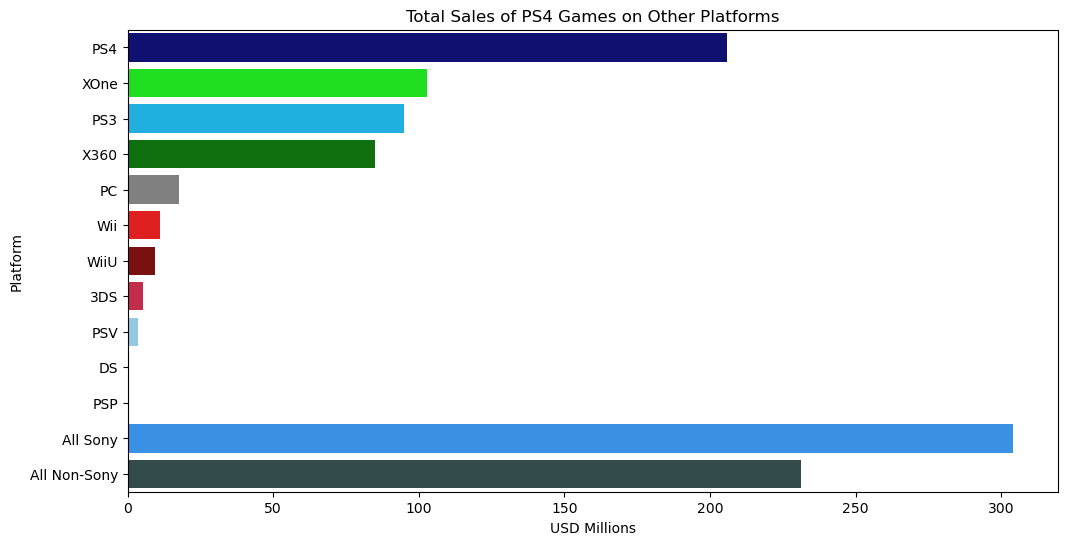

In [41]:
# List of PlayStation 4 Games
ps4_games = ps4_df['name'].unique().tolist()

# Define the DF as a copy of the current DF where the name is in the list of PS4 games
ps4_games_other_platforms = df_current[df_current['name'].isin(ps4_games)].copy().drop(columns=['genre', 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'rating', 'critic_score', 'user_score']).reset_index(drop=True)

### Filter out Sony Exclusive titles (titles only available on the PS platforms) ###
# For the sake of comparing sales among like titles, we will remove titles that are exclusive to Sony platforms
# List of all platforms
all_platforms = ps4_games_other_platforms['platform'].unique().tolist()

# List of Sony (PlayStation) Platforms
sony_platforms = ['PS', 'PS2', 'PS3', 'PSP', 'PSV', 'PS4']

# List of non-Sony platforms
non_sony_platforms = [platform for platform in all_platforms if platform not in sony_platforms]

# Games on non-Sony platforms
non_sony_games = ps4_games_other_platforms[ps4_games_other_platforms['platform'].isin(non_sony_platforms)].copy()['name'].unique().tolist()

# List of Sony Exclusives
sony_exclusives = [game for game in ps4_games if game not in non_sony_games]

print(f"Number of Sony Exclusives: {len(sony_exclusives)}")

# Drop Tittles in Sony Exclusives
ps4_games_other_platforms = ps4_games_other_platforms[~ps4_games_other_platforms['name'].isin(sony_exclusives)].copy().reset_index(drop=True)
############################################

# Group by platform and sum total sales
ps4_games_other_platforms = ps4_games_other_platforms.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).reset_index(drop=True)

# Total sales of all non Sony platforms
non_sony_sales = ps4_games_other_platforms[ps4_games_other_platforms['platform'].isin(non_sony_platforms)]['total_sales'].sum()

# Total sales for all Sony Platforms
sony_sales = ps4_games_other_platforms[ps4_games_other_platforms['platform'].isin(sony_platforms)]['total_sales'].sum()

# Append to the DF
ps4_games_other_platforms = pd.concat([ps4_games_other_platforms, pd.DataFrame({'platform': ['All Sony','All Non-Sony'], 'total_sales': [sony_sales, non_sony_sales]})], ignore_index=True)

display(ps4_games_other_platforms)

# Update the color dictionary
color_dict['All Non-Sony'] = 'darkslategray'
color_dict['All Sony'] = 'dodgerblue'


#Check that all platforms have a unique color
check_color_assignment()


# Plot the df
plot = sns.barplot(data=ps4_games_other_platforms, x='total_sales', y='platform', palette=color_dict)

# Set the title
plot.set_title('Total Sales of PS4 Games on Other Platforms')
# Set the labels
plot.set(xlabel='USD Millions', ylabel='Platform')

# Save the plot
plt.savefig('images/total_sales_ps4_games_other_platforms.png')

plt.show()

This chart depicts the PlayStation 4’s (and Sony’s, in general) dominance within the marketplace. For video games available on multiple platforms (from competing manufacturers), the PlayStation 4 holds a commanding lead in total sales over the Xbox one, followed closely by the PlayStation 3. Like wise, we can see Sony as a whole is leading far ahead of the cumulative efforts of all the other manufacturers in the modern era.  

Note: For the sake of fair comparison, Sony exclusives (tittles only available on the PlayStation platforms) have been excluded from the total sales numbers. 

# Game Genre Analysis

In [42]:
# Define the DF, grouped by genre, summed total sales, and count of unique titles
genre_sales = df_current[['genre', 'total_sales', 'name']].copy().groupby('genre').agg({'total_sales': ['sum', 'mean'], 'name': 'nunique'}).reset_index().rename(columns={'name': 'games'}).sort_values(by=('total_sales', 'sum'), ascending=False).reset_index(drop=True)
# Flatten the columns
genre_sales.columns = ['genre', 'total_sales_sum', 'total_sales_mean', 'games']

display(genre_sales)


,genre,total_sales_sum,total_sales_mean,games
0,Action,441.120,0.427856,573
1,Shooter,304.510,1.301325,95
2,Role-Playing,192.800,0.521081,265
3,Sports,180.955,0.677734,99
4,Misc,85.040,0.442917,130
5,Platform,61.000,0.717647,46
6,Racing,53.265,0.467237,48
7,Fighting,44.490,0.408165,61
8,Simulation,33.700,0.426582,60
9,Adventure,29.430,0.097450,216


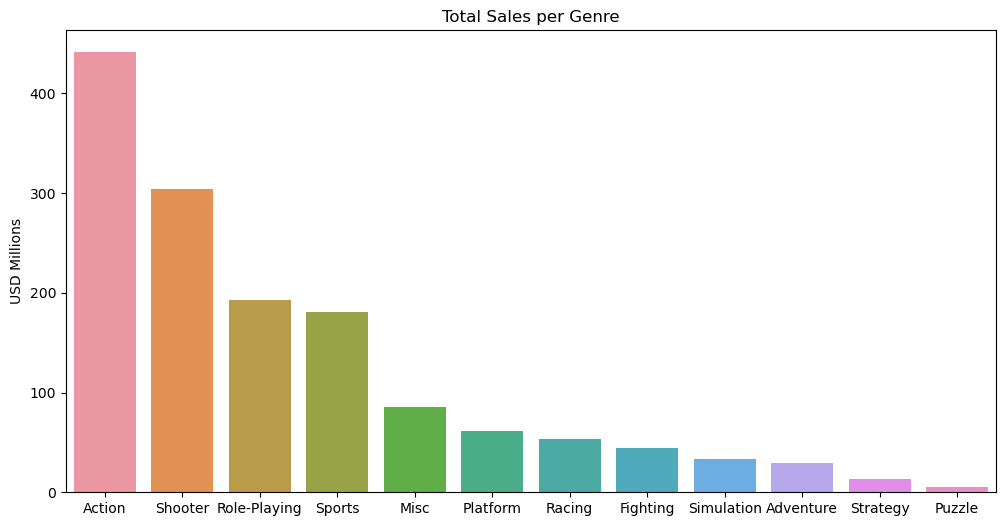

In [43]:
# Plot total sales sum per genre
plot = sns.barplot(data=genre_sales, x='genre', y='total_sales_sum')

# Set the title
plot.set_title('Total Sales per Genre')
# Set the labels
plot.set(xlabel='', ylabel='USD Millions')

# Save the plot
plt.savefig('images/total_sales_per_genre.png')

plt.show()

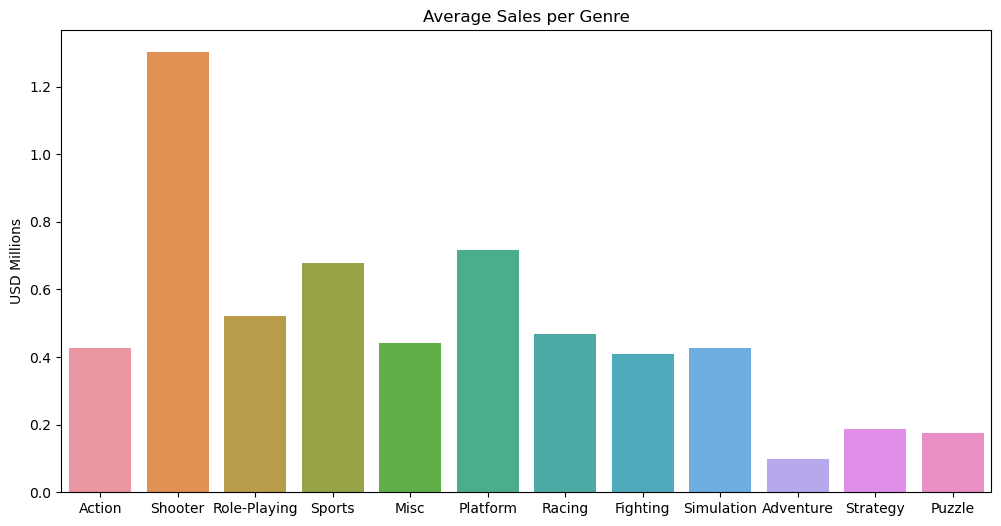

In [44]:
# Plot the mean sales per genre
plot = sns.barplot(data=genre_sales, x='genre', y='total_sales_mean')

# Set the title
plot.set_title('Average Sales per Genre')
# Set the labels
plot.set(xlabel='', ylabel='USD Millions')

# Save the plot
plt.savefig('images/average_sales_per_genre.png')

plt.show()

In [45]:
def get_genre_sales_details(df):
    """
    Calculate genre sales details and generate distribution plots. Saves the plots to the images folder.

    Parameters:
    - df (DataFrame): The input DataFrame containing the sales data.

    Returns:
    - genre_stats (dict): A dictionary containing the genre statistics, most popular game, least popular game. The key is the genre and the value is a tuple containing the DataFrame with the statistics, the most popular game, and the least popular game.

    """

    # Genre List
    genres = df['genre'].unique().tolist()

    # Empty Dict to hold genre stats
    genre_stats = {}

    for genre in genres:
        # Filter the df by genre
        genre_df = df[df['genre'] == genre].copy().dropna(subset=['total_sales']).reset_index(drop=True)
        
        ### Summary Statistics ###
        #Title of most popular game
        most_popular_game = genre_df.loc[genre_df['total_sales'].idxmax(), 'name']
        # Title of least popular game
        least_popular_game = genre_df.loc[genre_df['total_sales'].idxmin(), 'name']
        # Variance
        sales_variance = genre_df['total_sales'].var()
        # Describe
        stats_df = genre_df['total_sales'].describe().reset_index(drop=False).rename(columns={'index': 'statistic'})
        
        # Add variance to the df
        stats_df = pd.concat([stats_df, pd.DataFrame({'statistic': ['variance'], 'total_sales': [sales_variance]})], ignore_index=True)
        # Reorder rows so that variance is at index 3
        stats_df = stats_df.reindex([0, 1, 2, 8, 3, 4, 5, 6, 7]).reset_index(drop=True)
        
        # Add the df and the most and least popular games to the dictionary
        genre_stats[genre] = stats_df, most_popular_game, least_popular_game
        
        
        ### Build the distribution plot ###
        plot = sns.histplot(data=genre_df, x='total_sales', stat='count', kde=True)
        
        # Set the title
        plot.set_title(f'Distribution of Total Sales for {genre} Games')
    
        # Set the labels
        plot.set(xlabel='USD Millions', ylabel='')
        
        # Get the mean and STD for the legend
        mean = stats_df.loc[stats_df['statistic'] == 'mean', 'total_sales'].values[0]
        std = stats_df.loc[stats_df['statistic'] == 'std', 'total_sales'].values[0]

        # Create a legend with custom labels and no handles
        plot.legend(labels=[f"Mean: ${mean*1000000:.2f}", f"STD: {std:.2f}", f"VAR: {sales_variance:.2f}"], title="Statistics", loc="upper right", handlelength=0)
        
        # Save the plot
        plt.savefig(f'images/distribution_total_sales_{genre}.png')

        # Outputs
        plt.show()
        display(stats_df)
        print(f"Most Popular Game: {most_popular_game}, Least Popular Game: {least_popular_game}")
    return genre_stats

#genre_stats = get_genre_sales_details(df_current)

### Findings

The general distribution of games by genre indicates that "Action" and "Shooter" are the most profitable genres, with "Action" games boasting the highest total sales due to a large volume of titles and "Shooter" games having the highest average sales, suggesting higher profitability per title. On the other hand, genres like "Puzzle" and "Strategy" have both lower total and average sales, pointing to a smaller market presence and niche appeal. This distribution suggests that high-sales genres benefit from blockbuster titles and mass appeal, while low-sales genres cater to more specialized audiences and may not see the same level of blockbuster success.

# Regional Analysis

## Top Platforms by Region

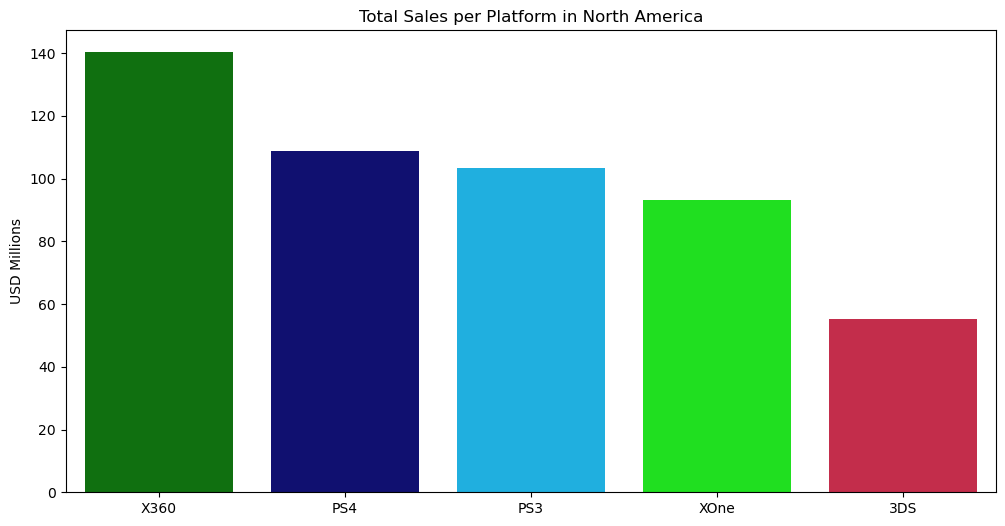

,platform,na_sales
0,X360,140.24
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


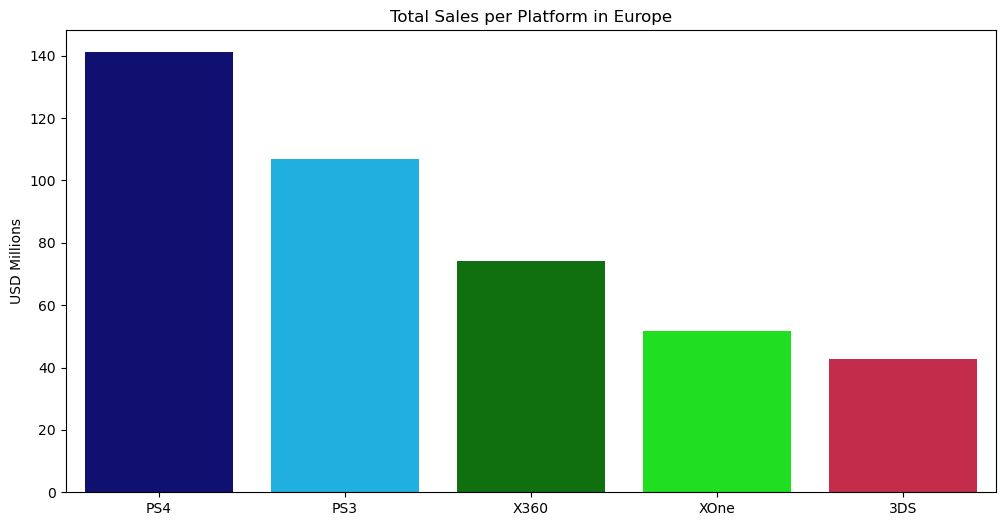

,platform,eu_sales
0,PS4,141.090
1,PS3,106.745
2,X360,74.195
3,XOne,51.590
4,3DS,42.640


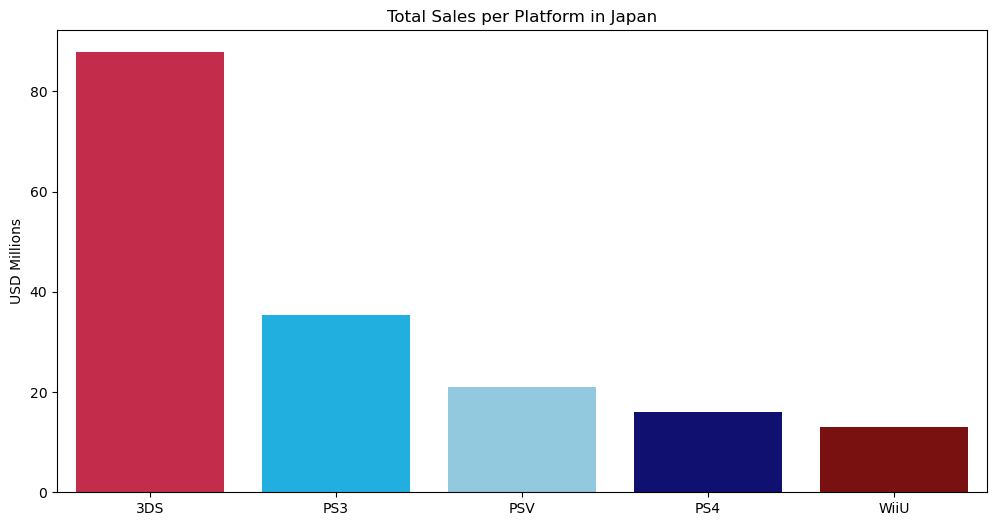

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


In [46]:
def get_top5_plats_per_region(df):
    """
    Get the top 5 platforms per region based on sales data.

    Args:
        df (pandas.DataFrame): The input DataFrame containing sales data.

    Returns:
        None
    
    Prints the top 5 platforms per region and saves the plots to the images folder.
    """

    regions = ['na_sales', 'eu_sales', 'jp_sales']

    for region_sales in regions:
        # Group by platform and sum total sales
        region_sales_df = df[['platform', region_sales]].copy().groupby('platform')[region_sales].sum().reset_index().sort_values(by=region_sales, ascending=False).reset_index(drop=True)
        
        # Keep only the top 5 platforms
        region_sales_df = region_sales_df.head(5)
        
        # Plot the df
        plot = sns.barplot(data=region_sales_df, x='platform', y=region_sales, palette=color_dict)
        
        # Translation Dictionary for regions
        region_dict = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
        # Set the title
        plot.set_title(f'Total Sales per Platform in {region_dict[region_sales]}')
        # Set the labels
        plot.set(xlabel='', ylabel='USD Millions')
        
        # Save the plot
        plt.savefig(f'images/total_sales_per_platform_{region_sales}.png')
        
        plt.show()
        
        display(region_sales_df)
        
get_top5_plats_per_region(df_current)

There are some significant differences in leading platforms between the North American, European, and Japanese markets. In North America, the leading platform is the Xbox 360, followed by the PlayStation 4, PlayStation 3, Xbox One, and 3DS. In Europe, the leading platform is the PlayStation 4, followed by the PlayStation 3, Xbox 360, Xbox One, and 3DS. North American sales on the Xbox 360 are about on par with European sales on the PlayStation 4, approximately 140 million. 

Japan’s leading platform is the 3DS, with only about 88 million in sales, followed by the PlayStation 3, PlayStation Vita, PlayStation 4, and Wii U. Not only does the Japanese market show significantly lower sales overall, but their leading platforms are very different from that of the Western markets. Their leading platforms are exclusively Japanese manufacturers (Sony and Nintendo), with the 3DS being the top seller in their market, and 5th best seller in the Western Markets. Also of note, the 3DS is a portable gaming platform, while the PS4 and X360 are non-portable platforms. Japan’s market is the only of the three with two portable platforms represented in its top sellers (see the PlayStation Vita). This speaks to a greater appreciation for portable systems in the Japanese market. 

## Top Genres by Region

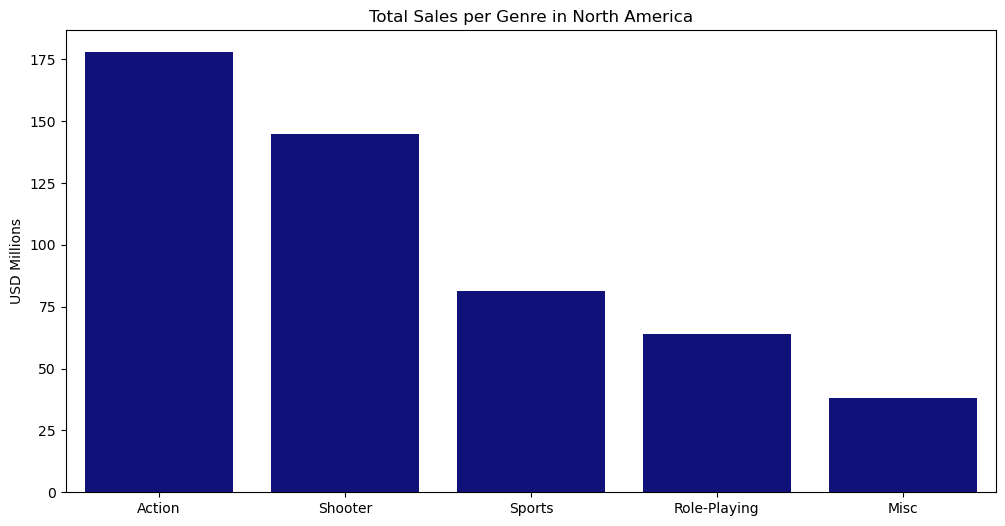

,genre,na_sales
0,Action,177.84
1,Shooter,144.70
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


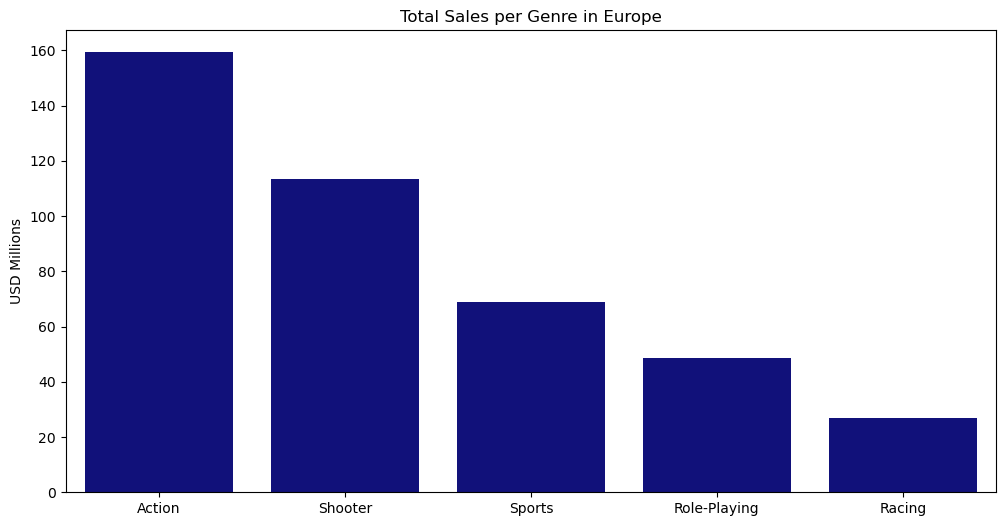

,genre,eu_sales
0,Action,159.340
1,Shooter,113.340
2,Sports,68.975
3,Role-Playing,48.530
4,Racing,26.905


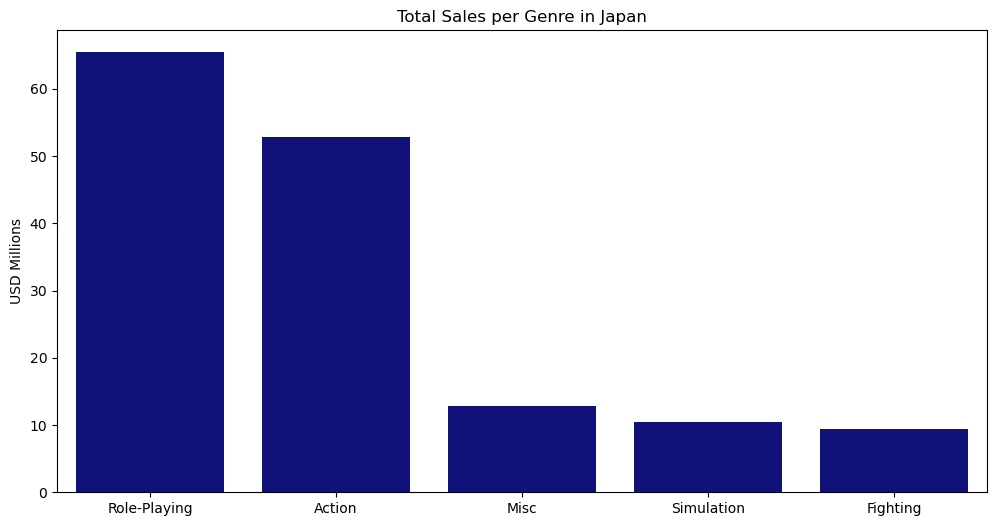

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


In [47]:
def get_top_five_genres_per_region(df):
    """
    Get the top 5 genres per region based on sales data.

    Args:
        df (pandas.DataFrame): The input DataFrame containing sales data.

    Returns:
        None
    
    Prints the top 5 genres per region and saves the plots to the images folder.
    """

    regions = ['na_sales', 'eu_sales', 'jp_sales']

    for region_sales in regions:
        # Group by genre and sum total sales
        region_sales_df = df[['genre', region_sales]].copy().groupby('genre')[region_sales].sum().reset_index().sort_values(by=region_sales, ascending=False).reset_index(drop=True)    
        
        # Keep only the top 5 genres
        region_sales_df = region_sales_df.head(5)
        
        # Plot the df
        plot = sns.barplot(data=region_sales_df, x='genre', y=region_sales, color='darkblue')
        
        # Translation Dictionary for regions
        region_dict = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
        # Set the title
        plot.set_title(f'Total Sales per Genre in {region_dict[region_sales]}')
        # Set the labels
        plot.set(xlabel='', ylabel='USD Millions')
        
        # Save the plot
        plt.savefig(f'images/total_sales_per_genre_{region_sales}.png')
        
        plt.show()
        
        display(region_sales_df)
        
get_top_five_genres_per_region(df_current)

When looking at the top performing genres, we see even more alignment between North America and Europe verses Japan. The top four selling genres in North America are the same as in Europe; Action, Shooter, Sports, Role-Playing (in that order). The catch all ‘Miscellaneous’ genre takes fifth place in North America, while Racing takes fifth in Europe. 

Japan’s top selling genre is Role-Playing, in a markedly different position than in the Western markets. Action, in second place, speaks to genres broad global appeal since it takes the lead in the Western markets. We see the catch all ‘Miscellaneous’ genre in third place (but these games could be significantly different than the Miscellaneous games selling well in North America - do to the generic nature of that genre’s grouping). The fourth and fifth best selling genres in Japan, Simulation and Fighting, are not represented at all in the top genres for Western markets. 

The notable differences between Western markets and Japan speak to significant disparities in video game genre preferences. Notably, the Action genre stands out as having the best chance for success across all three regional markets.

## Effect of ESRB ratting on Sales per Region

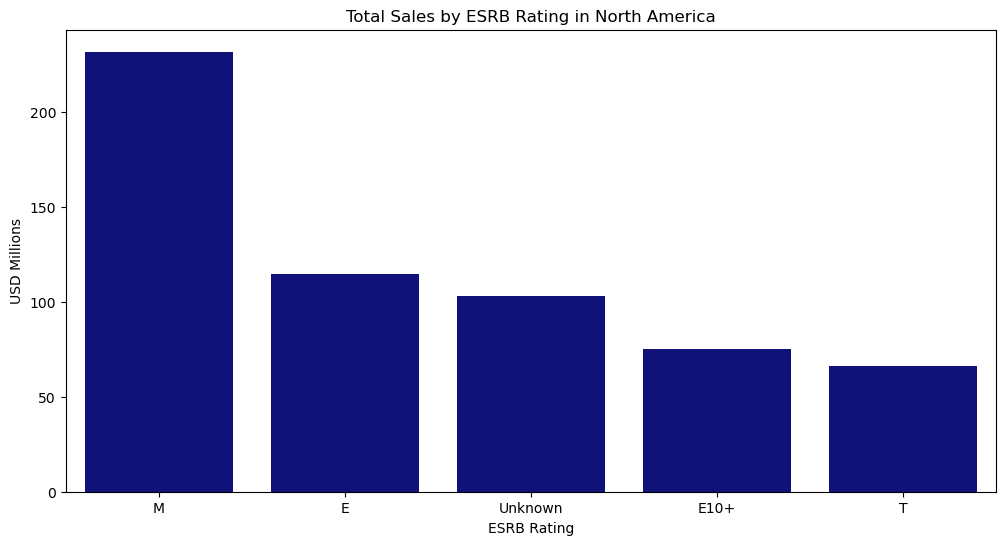

,rating,na_sales
0,M,231.57
1,E,114.37
2,Unknown,103.24
3,E10+,75.22
4,T,66.21


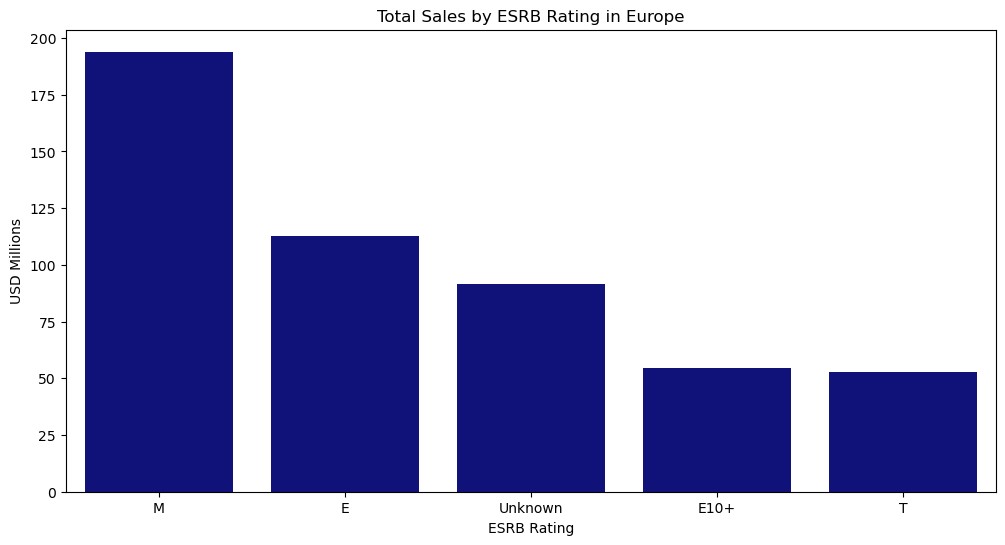

,rating,eu_sales
0,M,193.960
1,E,112.915
2,Unknown,91.370
3,E10+,54.600
4,T,52.575


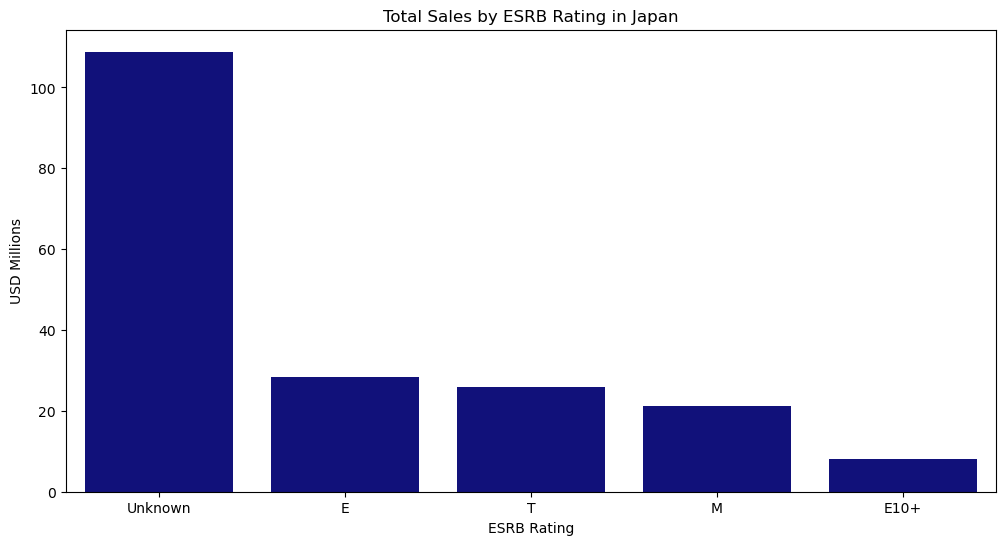

,rating,jp_sales
0,Unknown,108.840
1,E,28.330
2,T,26.025
3,M,21.200
4,E10+,8.190


In [48]:
def get_sales_by_esrbratting_per_region(df):
    """
    Get the total sales by ESRB rating per region based on sales data.

    Args:
        df (pandas.DataFrame): The input DataFrame containing sales data.

    Returns:
        None
    
    Prints the total sales by ESRB rating per region and saves the plots to the images folder.
    """

    regions = ['na_sales', 'eu_sales', 'jp_sales']

    for region_sales in regions:
        # Group by rating and sum total sales
        region_sales_df = df[['rating', region_sales]].copy().groupby('rating')[region_sales].sum().reset_index().sort_values(by=region_sales, ascending=False).reset_index(drop=True)    
        
        # Plot the df
        plot = sns.barplot(data=region_sales_df, x='rating', y=region_sales, color='darkblue')
        
        # Translation Dictionary for regions
        region_dict = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
        # Set the title
        plot.set_title(f'Total Sales by ESRB Rating in {region_dict[region_sales]}')
        # Set the labels
        plot.set(xlabel='ESRB Rating', ylabel='USD Millions')
        
        # Save the plot
        plt.savefig(f'images/total_sales_by_esrb_rating_{region_sales}.png')
        
        plt.show()
        
        display(region_sales_df)
        
get_sales_by_esrbratting_per_region(df_current)

First and foremost, we have some ambiguity in our findings here due to missing information in the data set. However, we can still draw one important conclusion. 

Again, we see strong alignment between the North American and European markets. In both cases, the most age restrictive ESRB category (M for mature) wins out as the highest selling ratting. The 100% overlap in the order of ESRB ratting popularity between North America and Europe, speaks to a strongly shared preference in the ESRB ratings. 

In Japan, the highest selling ESRB category is the “Unknown” category due to missing values in the data set. This makes up over fifty percent of the data set, making it difficult to draw any trustable conclusions. Additional work should be done to fill in these missing values before attempting to draw any actionable business insights. This would also strengthen the analysis between the western markets. 

# Hypothesis Testing

## Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same.

In [49]:
def test_hypth1(df):
    """
    Perform a hypothesis test to compare user scores between the Xbox One and PC platforms.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the platform and user score columns.

    Returns:
    None
    """

    # Define the null hypothesis
    null_hypth = "There is no significant difference in user scores between the Xbox One and PC platforms."

    # Define the hypth_df as a copy of the current DF with only the platform and user score columns
    hypth_df = df[['platform', 'user_score']].copy().dropna().reset_index(drop=True)

    # Keep only the Xbox One and PC platforms
    hypth_df = hypth_df[hypth_df['platform'].isin(['XOne', 'PC'])].reset_index(drop=True)

    # Define the groups
    xone_group = hypth_df.query('platform == "XOne"')['user_score']
    pc_group = hypth_df.query('platform == "PC"')['user_score']

    # Test the hypothesis
    alpha = 0.05  # Set Alpha to 0.05 per standard business practice

    # Get the variance of the groups
    xone_var = xone_group.var()
    pc_var = pc_group.var()

    # Use lavene test to check for equal variance
    if st.levene(xone_group, pc_group).pvalue > .05:  # unique alph for levene test, if p-value > alpha, equal variance
        var_equal = True
    else:
        var_equal = False

    # Perform the t-test using ind since the groups are independent
    pvalue = st.ttest_ind(xone_group, pc_group, equal_var=var_equal).pvalue
    print(f'P-value: {pvalue}')

    # Print the results
    if pvalue < alpha:
        print(f'The null hypothesis: "{null_hypth}" is rejected.')
    else:
        print(f'The null hypothesis: "{null_hypth}" cannot be rejected.')
    
    
    
test_hypth1(df_current)

P-value: 0.5932912783575963
The null hypothesis: "There is no significant difference in user scores between the Xbox One and PC platforms." cannot be rejected.


Hypothesis 1 was already stated as a null hypothesis (The null hypothesis in a statistical test usually states that there is no effect or no difference between groups). With an Alpha value of 5%  (chosen according to standard business practices), the null hypothesis cannot be rejected. In other words, there is not enough evidence to say that there is a significant difference in user scores between the Xbox One and PC platforms. The scores could be similar enough that any observed difference could reasonably occur by chance. Though, with just 1% more leeway, the null hypothesis would have been rejected.

## Hypothesis 2: Average user ratings for the Action and Sports genres are different.

In [50]:
def test_hypth2 (df):
    """
    Perform a hypothesis test to compare user scores between the Action and Sports genres.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the genre and user score columns.

    Returns:
    None
    """

    # Define the null hypothesis
    null_hypth = "There is no significant difference in user scores between the Action and Sports genres."

    # Define the hypth_df as a copy of the current DF with only the genre and user score columns
    hypth_df = df[['genre', 'user_score']].copy().dropna().reset_index(drop=True)

    # Keep only the Action and Sports genres
    hypth_df = hypth_df[hypth_df['genre'].isin(['Action', 'Sports'])].reset_index(drop=True)

    # Define the groups
    action_group = hypth_df.query('genre == "Action"')['user_score']
    sports_group = hypth_df.query('genre == "Sports"')['user_score']

    # Test the hypothesis
    alpha = 0.05  # Set Alpha to 0.05 per standard business practice

    # Get the variance of the groups
    action_var = action_group.var()
    sports_var = sports_group.var()

    # Use lavene test to check for equal variance
    if st.levene(action_group, sports_group).pvalue > .05:  # unique alph for levene test, if p-value > alpha, equal variance
        var_equal = True
    else:
        var_equal = False

    # Perform the t-test using ind since the groups are independent
    pvalue = st.ttest_ind(action_group, sports_group, equal_var=var_equal).pvalue
    print(f'P-value: {pvalue}')

    # Print the results
    if pvalue < alpha:
        print(f'The null hypothesis: "{null_hypth}" is rejected.')
    else:
        print(f'The null hypothesis: "{null_hypth}" cannot be rejected.')
        
test_hypth2(df_current)

P-value: 5.989458066467418e-20
The null hypothesis: "There is no significant difference in user scores between the Action and Sports genres." is rejected.


Hypothesis 2 was originally stated as an alternative hypothesis, so we formulate the null hypothesis as "There is no significant difference in user scores between the Action and Sports genres." With a P-value of 5.989458066467418e-20 (practically zero), the probability of observing the difference in user scores between the Action and Sports genres due to random chance is nearly zero. In other words, there is very strong evidence that there is a significant difference in user scores between these two genres.

# Final Conclusions

This notebook has explored and provided insights into various facets of video game sales and trends, notably focusing on platform life cycles, genre profitability, and regional preferences. Below are the summarized conclusions:

1. **Data Cleaning Process**: The notebook effectively cleaned and resolved several data integrity issues, ensuring that subsequent analyses were performed on reliable and accurate data.

2. **Platform Lifecycle**: An average lifecycle of approximately five years was determined for gaming platforms, offering valuable insights into the typical market duration before obsolescence or replacement.

3. **Leading Platform Analysis**: The PlayStation 4 emerged as the dominant platform in terms of global sales, underscoring Sony's strong market presence.

4. **Market Dominance**: Sony and the PlayStation 4's supremacy was evident, particularly when analyzing the global sales of games available across multiple platforms, further affirming their leadership in the gaming industry.

5. **Genre Profitability**: Action and Shooter genres were identified as the most profitable, which suggests a strong consumer preference for these types of games.

6. **Regional Differences**: There were significant differences observed in top platforms, preferred genres, and the impact of ESRB ratings between various regions. This highlights the cultural and demographic influences on gaming trends.

7. **Hypothesis Testing Conclusions**:
   - **Hypothesis 1**: Investigated the claim that average user ratings of the Xbox One and PC platforms are the same. The null hypothesis was not rejected, indicating little statistical significance to any perceived differences in user rating between the two platforms.
   - **Hypothesis 2**: Analyzed the difference in user scores between the Action and Sports genres, concluding with significant evidence against the null hypothesis, indicating a substantial difference in user scores between these genres.

These conclusions provide a comprehensive overview of trends in the video game industry and could serve as a strategic guide for stakeholders in making informed decisions about future projects and marketing strategies.
